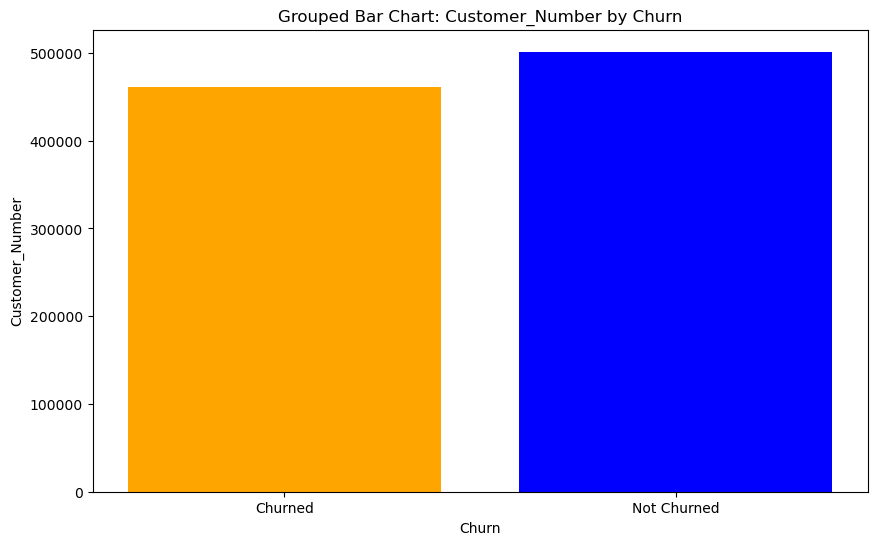

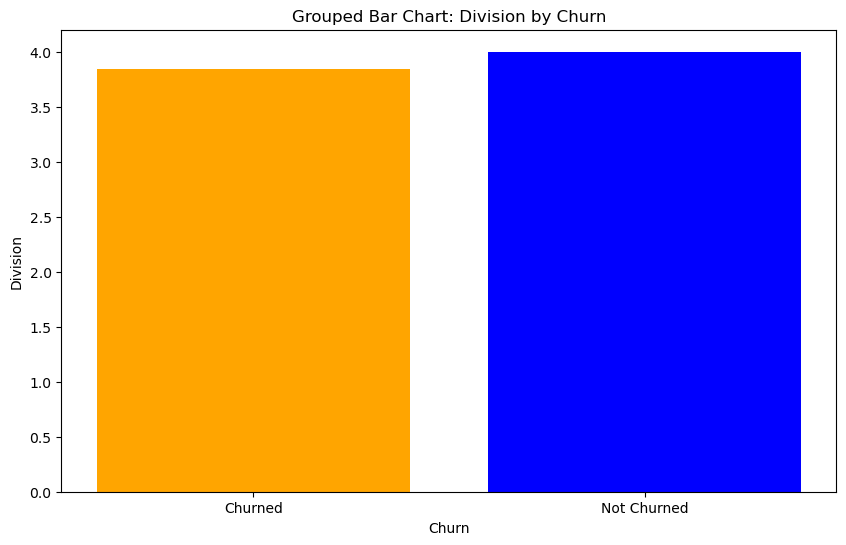

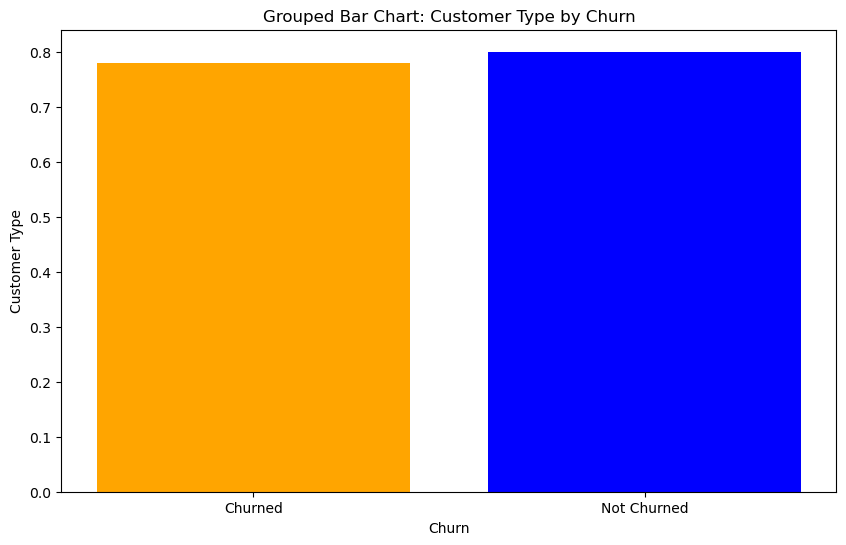

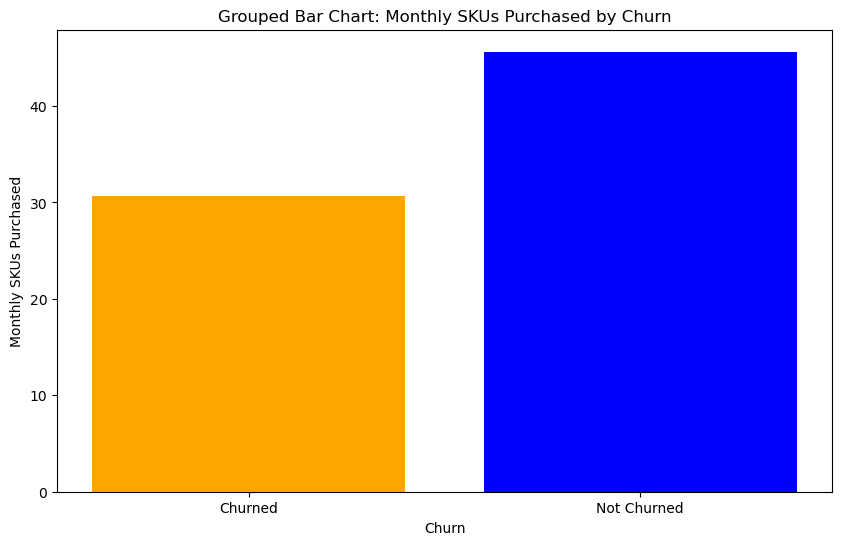

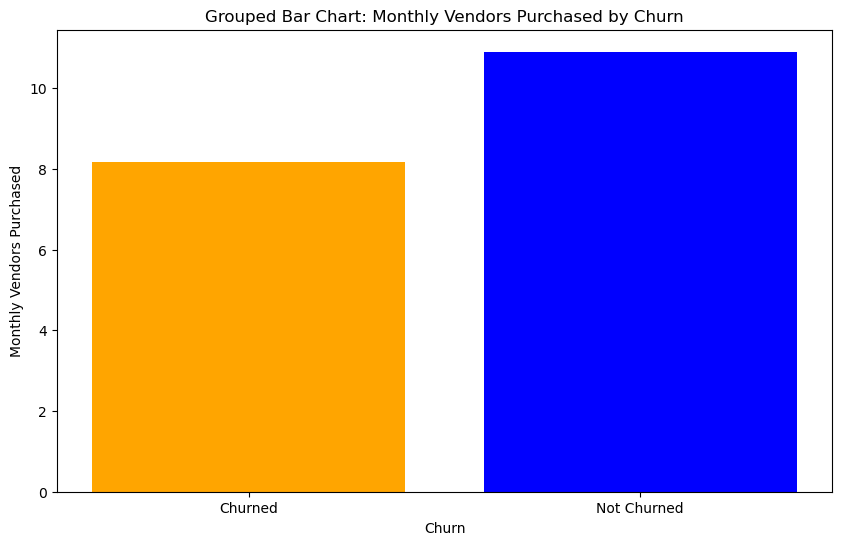

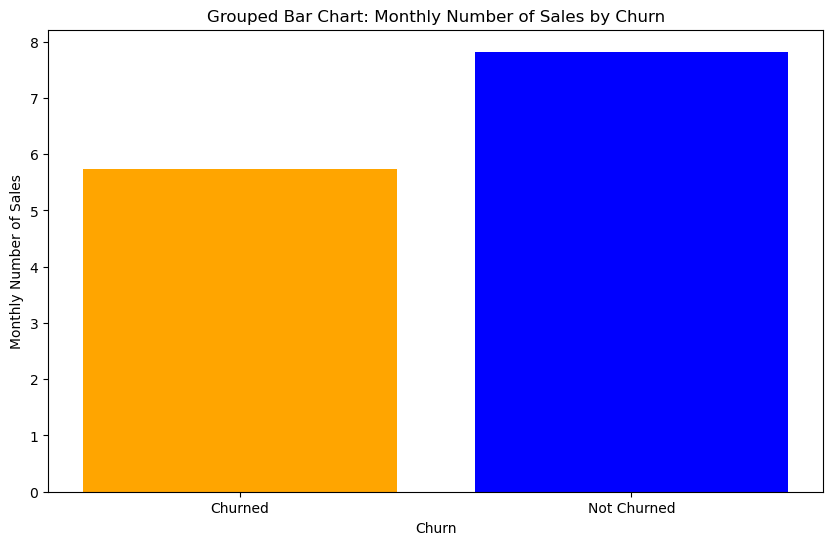

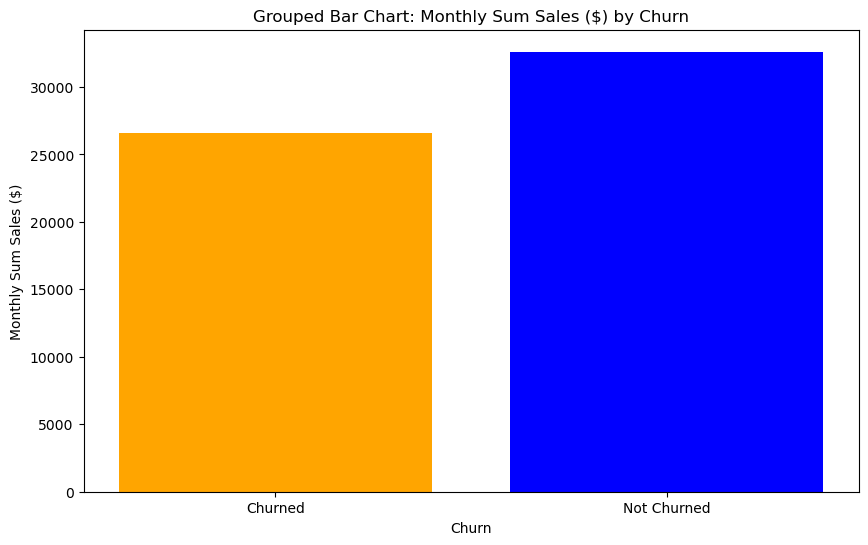

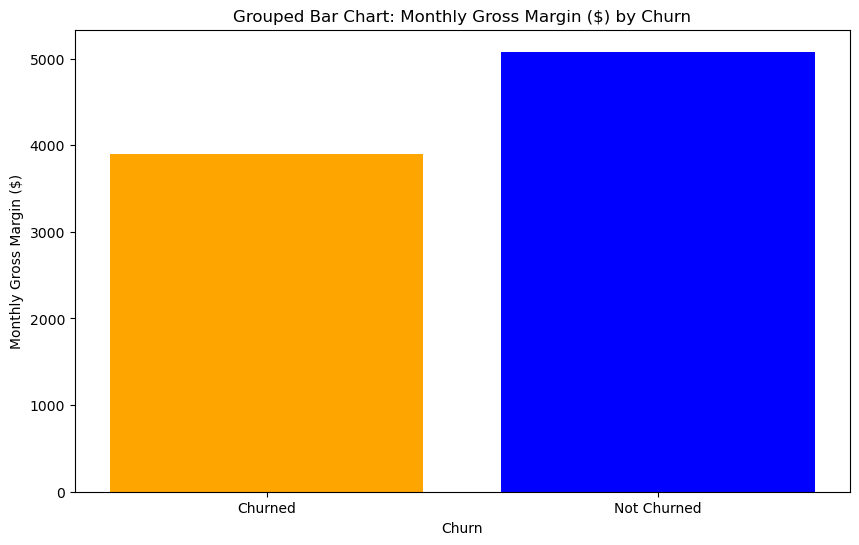

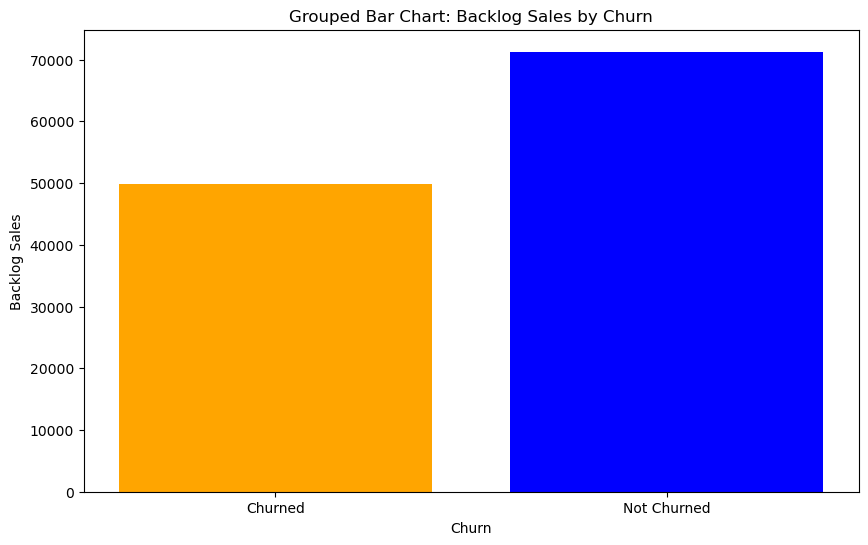

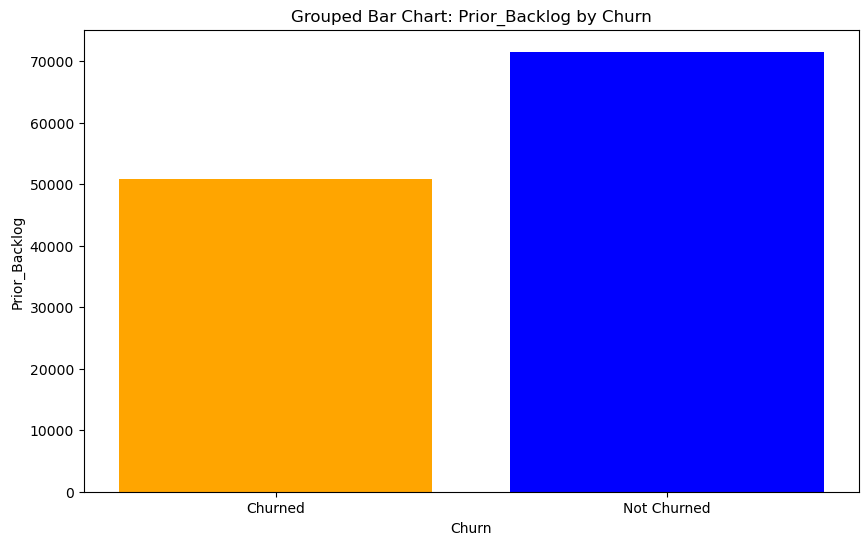

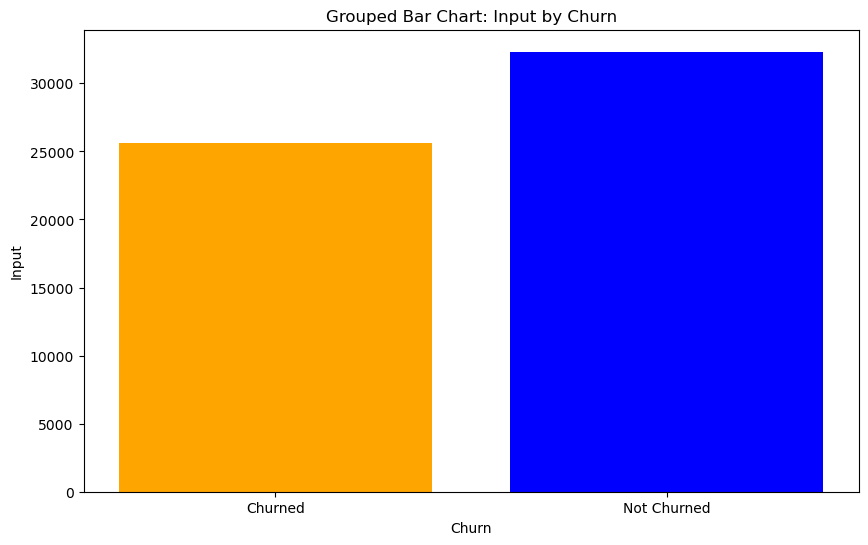

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Load your DataFrame
df = pd.read_csv('Final_data.csv')

# Create a new variable 'Churn1' where '1' represents 'Churn' and '0' represents 'Not Churn'
df['Churn1'] = df['Churned'].map({1: 'Churned', 0: 'Not Churned'})

# List of features to plot
features = [
    'Customer_Number', 'Division', 'Customer Type', 
    'Monthly SKUs Purchased', 'Monthly Vendors Purchased',
    'Monthly Number of Sales', 'Monthly Sum Sales ($)',
    'Monthly Gross Margin ($)', 'Backlog Sales',
    'Prior_Backlog', 'Input'
]

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Division', 'Customer Type']  # Replace with your categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Iterate over each feature and create a plot
for feature in features:
    # Group by 'Churn1' and calculate the mean of the current feature
    grouped_data = df.groupby('Churn1')[feature].mean().reset_index()

    # Plot the grouped bar chart
    plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
    plt.bar(grouped_data['Churn1'], grouped_data[feature], color=['orange', 'blue'])
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.title(f'Grouped Bar Chart: {feature} by Churn')
    plt.show()